In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re
import os

%matplotlib inline


In [85]:
def get_plot_data(path, span=1000):
    df = pd.DataFrame()

    with open(path + 'test.txt') as file:
        data = pd.read_csv(file, index_col=None)
        df = df.append(data, ignore_index=True)

    df['r'] = df['r'].ewm(span=span).mean()
    return df


In [106]:
i = 4

TIMESTEP = 2.4e6
NSAMPLE = 1e4
GAMES = ['Breakout', 'Seaquest', 'Pong', 'MontezumaRevenge', 'BitFlip15']
TOPS = [10, 2000, 22, 10, 1, 1]
METHODS = ['ger', 'her', 'ddqn']

res_dir = './res/'
files = os.listdir(res_dir)
sample_list = np.arange(0, TIMESTEP, TIMESTEP/NSAMPLE, dtype=np.int)

df = pd.DataFrame()
for file in os.listdir(res_dir):
    m = re.match('(.*)_(.*)_(.*)', file)
    env = m.group(1)
    method = m.group(2)
    seed = m.group(3)
    if (GAMES[i] in env) and (method in METHODS):
        path = res_dir + file + '/'
        data = get_plot_data(path)

        sample = pd.DataFrame()
        sample['t'] = sample_list
        sample['r'] = np.nan
        
        # interpolation
        res = pd.concat([sample, data], join='inner')
        res.sort_values('t', inplace=True)
        res.interpolate(method='linear', inplace=True)
        res = res[res['t'].isin(sample_list)]

        res['seed'] = int(seed)
        res[''] = method
        df = df.append(res, ignore_index=True)

print(df)


             t         r  seed      
0            0       NaN    10  ddqn
1          240  0.000000    10  ddqn
2          480  0.000000    10  ddqn
3          720  0.000000    10  ddqn
4          960  0.000000    10  ddqn
5         1200  0.000000    10  ddqn
6         1440  0.000000    10  ddqn
7         1680  0.000000    10  ddqn
8         1920  0.000000    10  ddqn
9         2160  0.000000    10  ddqn
10        2400  0.000000    10  ddqn
11        2640  0.000000    10  ddqn
12        2880  0.000000    10  ddqn
13        3120  0.000000    10  ddqn
14        3360  0.000000    10  ddqn
15        3600  0.000000    10  ddqn
16        3840  0.000000    10  ddqn
17        4080  0.000000    10  ddqn
18        4320  0.000000    10  ddqn
19        4560  0.000000    10  ddqn
20        4800  0.000000    10  ddqn
21        5040  0.000000    10  ddqn
22        5280  0.000000    10  ddqn
23        5520  0.000000    10  ddqn
24        5760  0.000000    10  ddqn
25        6000  0.000000    10  ddqn
2

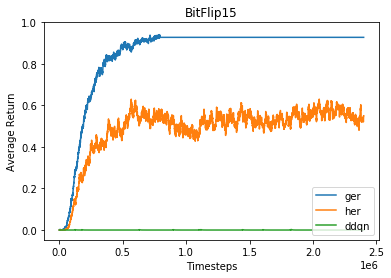

In [107]:
ax = sns.lineplot(x='t', y='r', hue='', ci=95, n_boot=10, 
                  hue_order=['ger', 'her', 'ddqn'], 
                  data=df)
ax.set(title=GAMES[i],
       xlabel='Timesteps', ylabel='Average Return')
plt.ylim(top=TOPS[i])
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,3))
plt.legend(loc='lower right')
# plt.savefig('/home/liuyuezhangadam/Desktop/'+GAMES[i]+'.png', dpi=300)
